In [7]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [9]:
%matplotlib inline

#주피터 노트북 내부에 그림 표시하게 명령
#UsageError: unrecognized arguments가 나오는 이유 -> 저 명령에선 '#'이 주석이 아님

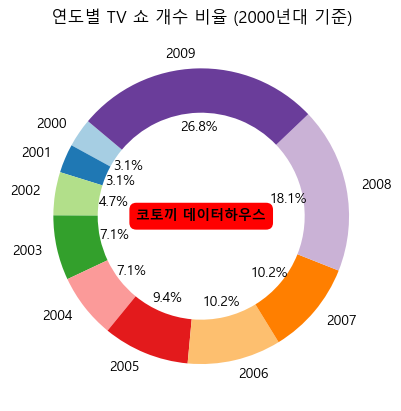

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('netflix_titles.csv')

data['date_added'] = pd.to_datetime(data['date_added'], format='%d-%b-%y', errors='coerce')

data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')
data['type'] = data['type'].astype('category')

data_2000s = data[(data['release_year'] >= 2000) & (data['release_year'] < 2010)]

tv_shows = data_2000s[data_2000s['type'] == 'TV Show']

tv_shows_per_year = tv_shows.groupby('release_year').size()

plt.pie(tv_shows_per_year, labels=tv_shows_per_year.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3), colors=plt.cm.Paired(range(len(tv_shows_per_year))))

# 차트 제목
plt.title('연도별 TV 쇼 개수 비율 (2000년대 기준)')
plt.text(0, 0, '코토끼 데이터하우스', 
         horizontalalignment='center', 
         verticalalignment='center', 
         fontsize=10, 
         fontweight='bold', 
         bbox=dict(facecolor='red', edgecolor='none', boxstyle='round,pad=0.5'))

# 파일로 저장
plt.savefig('넷플릭스 시각화.jpg', bbox_inches='tight')

# 차트 출력
plt.show()